In [5]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [6]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

train_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train"
test_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test"

In [9]:
def load_images(directory, target_size=(128,128),batch_size=32):
    images = []
    labels = []
    label_encoder = LabelEncoder()

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
                img = tf.keras.preprocessing.image.img_to_array(img)
                img = tf.keras.applications.resnet50.preprocess_input(img)

                images.append(img)
                labels.append(label)

    labels = label_encoder.fit_transform(labels)

    return np.array(images), np.array(labels)

In [10]:
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

In [12]:
model = models.Sequential([
    layers.Flatten(input_shape=(128, 128, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax') 
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/20
810/810 [==============================] - 10s 12ms/step - loss: 221.4069 - accuracy: 0.7508 - val_loss: 136.6042 - val_accuracy: 0.7785
Epoch 2/20
810/810 [==============================] - 5s 6ms/step - loss: 58.1054 - accuracy: 0.7521 - val_loss: 35.6843 - val_accuracy: 0.8082
Epoch 3/20
810/810 [==============================] - 4s 5ms/step - loss: 35.2187 - accuracy: 0.7686 - val_loss: 19.6315 - val_accuracy: 0.7713
Epoch 4/20
810/810 [==============================] - 5s 6ms/step - loss: 15.8475 - accuracy: 0.7584 - val_loss: 20.8730 - val_accuracy: 0.7699
Epoch 5/20
810/810 [==============================] - 5s 6ms/step - loss: 13.4430 - accuracy: 0.7437 - val_loss: 22.4288 - val_accuracy: 0.7310
Epoch 6/20
810/810 [==============================] - 4s 5ms/step - loss: 12.3840 - accuracy: 0.7408 - val_loss: 20.2688 - val_accuracy: 0.5841
Epoch 7/20
810/810 [==============================] - 5s 6ms/step - loss: 12.9501 - accuracy: 0.7490 - val_loss: 14.9260 - val_accur

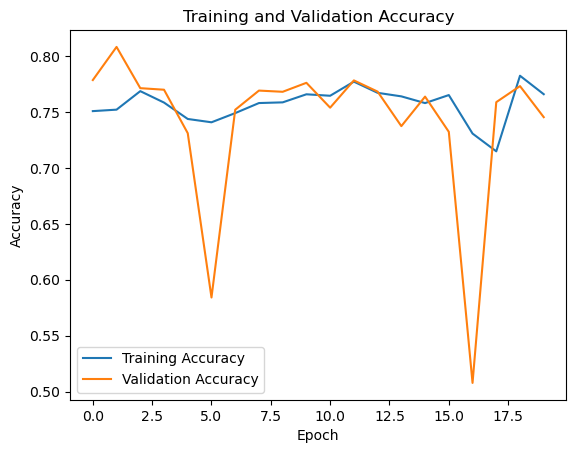

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [14]:
y_pred = np.argmax(model.predict(X_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

329/329 [==============================] - 1s 2ms/step
Confusion Matrix:
[[1979 1408  113]
 [   7 3410   83]
 [  62 1870 1568]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.57      0.71      3500
           1       0.51      0.97      0.67      3500
           2       0.89      0.45      0.60      3500

    accuracy                           0.66     10500
   macro avg       0.79      0.66      0.66     10500
weighted avg       0.79      0.66      0.66     10500

